# Chapter 5: Integrate-and-fire neurons and population models

### Load needed modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 5.1: Leaky integrate and fire models
In Chapter 4, we saw that spikes can be described and simulated with great detail.

However, for the purpose of modeling information transmission in the brain at higher levels (populations, networks), it is not entirely necessary to simulate precisely the somewhat stereotyped shape of action potentials.

In contrast, spike timing is certainly more influential on the processing of spiking elements in networks. Thus, for integrating neurons into populations and networks, it is not more relevant the integration of synaptic input leading to a generation and the following recovery process of a spike.


Text(0, 0.5, 'v [mV]')

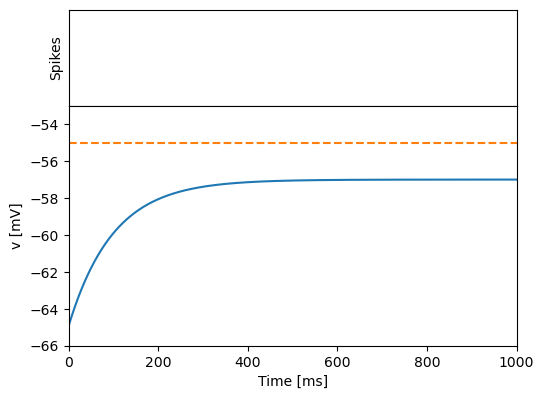

In [23]:
# Simulation of (leaky) integrate-and-fire neuron

# parameters of the model
dt = 0.1    # integration time step [ms]
tau = 10    # time constant [ms]
E_L = -65   # resting potential [mV]
theta = -55 # firing threshols [mV]
RI_ext = 8  # constant external input [mA/Ohm]

# Integration with Euler method
v_rec = np.array([]) # voltage
t_rec = np.array([]) # time
s_rec = np.array([]) # spikes
t_step = 0; v = E_L
for t in range(int(100/dt)):
    s=v>theta
    v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)-RI_ext))
    v_rec=np.append(v_rec, v)
    t_rec=np.append(t_rec, t)
    s_rec=np.append(s_rec, s)

# Plotting results
ax1 = plt.axes([0.2, 0.7, 0.7, 0.2])
ax1.plot(t_rec, s_rec, '.', markersize=20)
ax1.axis([0, 100/dt, 0.5, 1.5])
plt.xticks([], []); plt.yticks([], [])
plt.ylabel('Spikes')

ax2 = plt.axes([0.2, 0.2, 0.7, 0.5])
ax2.plot(t_rec, v_rec)
ax2.plot([0, 100/dt], [-55, -55], '--')
ax2.axis([0, 100/dt, -66, -53])
plt.xlabel('Time [ms]'); plt.ylabel('v [mV]')

## 5.3: Advanced integrate-and-fire models

#### Izhikevich model
The basic LIF model simulated above can be sufficient to address certain questions in which the subthreshold dynamics of the membrane potential or noisier input-responses are not taken into consideration.

This simplification comes at the cost of simulating a range of firing patterns that actual neurons can have.

Izhikevich's is an intermediate model which is computationally efficient while still being able to capture a large variety of response properties
of real neurons. Its solution is to integrate in the model a varying firing threshold.

Text(0, 0.5, 'v')

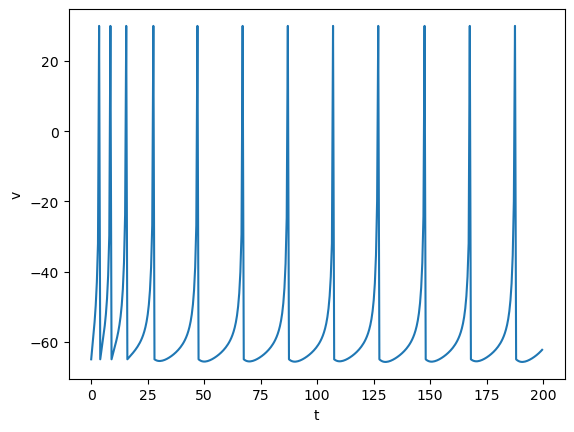

In [29]:
# Izhikevich model

# Parameters and initialization
a = 0.02; b=0.2; c=-65; d=2
Iext=10; v=[-65]; u=[-65*b]; t=[0]; dt=0.5

for step in range(1,int(200/dt)):
    # record time steps
    t.append(t[step-1]+dt)
    # numerical integration and recording of Izhikievich equations
    v.append(v[step-1] +
             dt*(0.04*v[step-1]**2+5*v[step-1]+140-u[step-1]+Iext))
    u.append(u[step-1]+dt*a*(b*v[step-1]-u[step-1]))
    if v[step]>30:
        v[step-1]=30; v[step]=c
        u[step]=u[step]+d
        
# Plotting results
plt.plot(t,v); plt.xlabel('t'); plt.ylabel('v')


## Homework
Due Monday, Feb. 17, 13.00. Send to jperez@bcbl.eu in either .doc, .txt, or just by inserting it in the markdown cell below and sending me a copy of this notebook
1. What are some similarities and differences between Fitzhugh-Nagumo and Integrate-and-fire models? For which simulation/description purpose would each of them be more suitable?
2. What is the purpose of including noise in an Integrate-and-fire model?
3. What do you think are some reasons to shift from single-neuron models that simulate spikes to populations models? Can you speculate on a certain cognitive (sub)process that could be approached with a simulation of a population model?